# Scrapping a wikipedia article

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import re
import string
import nltk                                  
from nltk.corpus import stopwords
import pandas as pd

In [2]:
!pip install requests
!pip install beautifulsoup4

In [3]:
response = requests.get(
    url="https://en.wikipedia.org/wiki/Yoga",
)
print(response.status_code)

200


In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.string)

Yoga


Getting all the links

In [5]:
allLinks = soup.find(id="bodyContent").find_all("a")
allLinks

[<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="mw-disambig" href="/wiki/Yoga_(disambiguation)" title="Yoga (disambiguation)">Yoga (disambiguation)</a>,
 <a href="/wiki/Yoga_as_exercise" title="Yoga as exercise">Yoga as exercise</a>,
 <a href="/wiki/Yoga_as_therapy" title="Yoga as therapy">Yoga as therapy</a>,
 <a class="mw-disambig" href="/wiki/Yog_(disambiguation)" title="Yog (disambiguation)">Yog (disambiguation)</a>,
 <a href="/wiki/Brahmic_scripts" title="Brahmic scripts">Indic text</a>,
 <a href="/wiki/Help:Multilingual_support_(Indic)" title="Help:Multilingual support (Indic)">rendering support</a>,
 <a href="/wiki/Mojibake" title="Mojibake">question marks or boxes</a>,
 <a href="/wiki/Category:Hinduism" title="Category:Hinduism">a series</a>,
 <a href="/wiki/Hinduism" title="Hinduism">Hinduism</a>,
 <a class="image" href="/wiki/File:1_Om.svg"><img alt="1 Om.svg" data-file-height="367" d

In [6]:
allcontent = soup.find(id="bodyContent").find_all("p")
allcontent

[<p class="mw-empty-elt">
 </p>, <p class="mw-empty-elt">
 </p>, <p><b>Yoga</b> (<span class="rt-commentedText nowrap"><span class="IPA nopopups noexcerpt"><a href="/wiki/Help:IPA/English" title="Help:IPA/English">/<span style="border-bottom:1px dotted"><span title="/ˈ/: primary stress follows">ˈ</span><span title="/j/: 'y' in 'yes'">j</span><span title="/oʊ/: 'o' in 'code'">oʊ</span><span title="/ɡ/: 'g' in 'guy'">ɡ</span><span title="/ə/: 'a' in 'about'">ə</span></span>/</a></span></span>;<sup class="reference" id="cite_ref-OED_1-0"><a href="#cite_note-OED-1">[1]</a></sup> <a class="mw-redirect" href="/wiki/Sanskrit_language" title="Sanskrit language">Sanskrit</a>: <span lang="sa">योग</span>; <span style="font-size:85%;"><span class="unicode haudio"><span class="fn"><span style="white-space:nowrap;margin-right:.25em;"><a href="/wiki/File:Yoga_pronunciation.ogg" title="About this sound"><img alt="About this sound" data-file-height="20" data-file-width="20" decoding="async" height="11"

In [7]:
print(soup.find_all('p')[2])

<p><b>Yoga</b> (<span class="rt-commentedText nowrap"><span class="IPA nopopups noexcerpt"><a href="/wiki/Help:IPA/English" title="Help:IPA/English">/<span style="border-bottom:1px dotted"><span title="/ˈ/: primary stress follows">ˈ</span><span title="/j/: 'y' in 'yes'">j</span><span title="/oʊ/: 'o' in 'code'">oʊ</span><span title="/ɡ/: 'g' in 'guy'">ɡ</span><span title="/ə/: 'a' in 'about'">ə</span></span>/</a></span></span>;<sup class="reference" id="cite_ref-OED_1-0"><a href="#cite_note-OED-1">[1]</a></sup> <a class="mw-redirect" href="/wiki/Sanskrit_language" title="Sanskrit language">Sanskrit</a>: <span lang="sa">योग</span>; <span style="font-size:85%;"><span class="unicode haudio"><span class="fn"><span style="white-space:nowrap;margin-right:.25em;"><a href="/wiki/File:Yoga_pronunciation.ogg" title="About this sound"><img alt="About this sound" data-file-height="20" data-file-width="20" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspe

In [8]:
print(soup.find_all('p')[2].get_text())

Yoga (/ˈjoʊɡə/;[1] Sanskrit: योग; pronunciation) is a group of physical, mental, and spiritual practices or disciplines which originated in ancient India. Yoga is one of the six orthodox philosophical schools of Hinduism.[2][3]



In [9]:
print(soup.find_all('p')[3].get_text())

There is a broad variety of yoga schools, practices, and goals[4] in Hinduism, Buddhism, and Jainism.[5][6][7] The term "Yoga" in the Western world often denotes a modern form of hatha yoga and yoga as exercise, consisting largely of the postures or asanas.



In [10]:
tot_parag=len(soup.find_all('p'))
tot_parag

118

In [11]:
l=[]
for i in range(0, tot_parag):
    text=soup.find_all('p')[i].get_text()
    l.append(text)
l

['\n',
 '\n',
 'Yoga (/ˈjoʊɡə/;[1] Sanskrit: योग; pronunciation) is a group of physical, mental, and spiritual practices or disciplines which originated in ancient India. Yoga is one of the six orthodox philosophical schools of Hinduism.[2][3]\n',
 'There is a broad variety of yoga schools, practices, and goals[4] in Hinduism, Buddhism, and Jainism.[5][6][7] The term "Yoga" in the Western world often denotes a modern form of hatha yoga and yoga as exercise, consisting largely of the postures or asanas.\n',
 "The practice of yoga has been thought to date back to pre-vedic Indian traditions; possibly in the Indus valley civilization around 3000 BCE.  Yoga is mentioned in the Rigveda,[note 1] and also referenced in the Upanishads,[9] though it most likely developed as a systematic study around the 5th and 6th centuries BCE, in ancient India's ascetic and Śramaṇa movements.[10][note 2] The chronology of earliest texts describing yoga-practices is unclear, varyingly credited to the Upanisha

In [12]:
text= ''
for i in range(0, len(l)):
    text=text+' '+ l[i]

In [13]:
text

' \n \n Yoga (/ˈjoʊɡə/;[1] Sanskrit: योग; pronunciation) is a group of physical, mental, and spiritual practices or disciplines which originated in ancient India. Yoga is one of the six orthodox philosophical schools of Hinduism.[2][3]\n There is a broad variety of yoga schools, practices, and goals[4] in Hinduism, Buddhism, and Jainism.[5][6][7] The term "Yoga" in the Western world often denotes a modern form of hatha yoga and yoga as exercise, consisting largely of the postures or asanas.\n The practice of yoga has been thought to date back to pre-vedic Indian traditions; possibly in the Indus valley civilization around 3000 BCE.  Yoga is mentioned in the Rigveda,[note 1] and also referenced in the Upanishads,[9] though it most likely developed as a systematic study around the 5th and 6th centuries BCE, in ancient India\'s ascetic and Śramaṇa movements.[10][note 2] The chronology of earliest texts describing yoga-practices is unclear, varyingly credited to the Upanishads.[11] The Yog

In [14]:
def process_text(text):
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    
    #Removing new line
    text=re.sub(r'\n', '', text )
    
    #Removing references
    text=re.sub(r'\[[0-9+]+]', '', text )
    
    #Replacing \'s by s
    text=re.sub(r"\'s" , "s", text )
    
    #Removing text in parenthesis
    text=re.sub("[\(\[].*?[\)\]]", '', text)
    
    
    return text

In [15]:
text_clean=process_text(text)
text_clean[0:1000]

'   Yoga  is a group of physical, mental, and spiritual practices or disciplines which originated in ancient India. Yoga is one of the six orthodox philosophical schools of Hinduism. There is a broad variety of yoga schools, practices, and goals in Hinduism, Buddhism, and Jainism. The term "Yoga" in the Western world often denotes a modern form of hatha yoga and yoga as exercise, consisting largely of the postures or asanas. The practice of yoga has been thought to date back to pre-vedic Indian traditions; possibly in the Indus valley civilization around 3000 BCE.  Yoga is mentioned in the Rigveda, and also referenced in the Upanishads, though it most likely developed as a systematic study around the 5th and 6th centuries BCE, in ancient Indias ascetic and Śramaṇa movements. The chronology of earliest texts describing yoga-practices is unclear, varyingly credited to the Upanishads. The Yoga Sutras of Patanjali date from the 2nd century BCE, and gained prominence in the west in the 20th

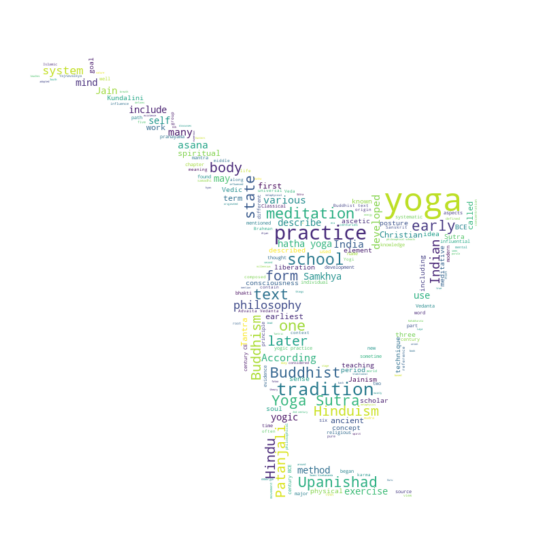

In [16]:
custom_mask = np.array(Image.open("meditate.jpg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text_clean)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Name Entity Recognition

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm") #English pipeline optimized for CPU. 
                                   #Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.

In [18]:
from spacy import displacy
doc = nlp(text_clean)
displacy.serve(doc, style="ent")

/Users/anmarphy/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [23]:
l=[]
for ent in doc.ents:
    l.append((ent.text, ent.label_))

In [53]:
Name_Entities=pd.DataFrame(l, columns=['Entity', 'Category'])
Name_Entities.tail()

,Entity,Category
740,May 2009,DATE
741,Turkeys,PERSON
742,the Directorate of Religious Affairs,ORG
743,Ali Bardakoğlu,PERSON
744,Islam,ORG


In [56]:
top_entities = (Name_Entities.groupby(by=['Entity', 'Category'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:10]

,0,1,2,3,4,5,6,7,8,9
Entity,Buddhist,Hindu,Indian,India,BCE,three,first,Christian,Yoga,one
Category,NORP,NORP,NORP,GPE,ORG,CARDINAL,ORDINAL,NORP,ORG,CARDINAL
Frequency,30,16,16,15,14,11,10,9,8,8


In [57]:
top_entities = (Name_Entities.groupby(by=['Category'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Category,PERSON,NORP,ORG,GPE,CARDINAL,DATE,LOC,ORDINAL,PRODUCT,WORK_OF_ART,FAC,LAW,LANGUAGE,EVENT
Frequency,167,130,114,94,81,78,21,18,14,13,7,3,3,2


In [34]:
Name_Entities=Name_Entities.drop_duplicates()
Name_Entities.shape[0]

475

In [50]:
Name_Entities['Category'].value_counts()

PERSON         123
ORG             80
DATE            70
GPE             56
NORP            45
CARDINAL        38
LOC             19
WORK_OF_ART     13
ORDINAL          9
PRODUCT          9
FAC              6
LAW              3
LANGUAGE         2
EVENT            2
Name: Category, dtype: int64

In [48]:
Name_Entities[Name_Entities['Category']=='WORK_OF_ART'].sort_values(by='Entity')

,Entity,Category
220,Brahman,WORK_OF_ART
266,Brahmanical Yoga,WORK_OF_ART
148,Early Buddhist Texts,WORK_OF_ART
512,Light on Yoga,WORK_OF_ART
188,Patanjalis Yoga Sutra,WORK_OF_ART
405,Tantra,WORK_OF_ART
135,The Buddha,WORK_OF_ART
13,The Yoga Sutras of,WORK_OF_ART
345,The Yoga Yajnavalkya,WORK_OF_ART
176,Vedic,WORK_OF_ART


## References
* https://spacy.io/usage/linguistic-features#named-entities
* https://www.freecodecamp.org/news/scraping-wikipedia-articles-with-python/
* https://www.kdnuggets.com/2018/08/named-entity-recognition-practitioners-guide-nlp-4.html